# OpenAPS IOB Calculations
----
The code in this notebook will replicate and visualize the IOB calculations used in the [OpenAPS project](https://github.com/openaps/oref0).

Specifically, it will replicate the javascript code found in [`OpenAPS/oref0/lib/iob/calculation.js`](https://github.com/openaps/oref0/blob/master/lib/iob/calculate.js) and plot insulin action curves for a set of Duration of Insulin Activity (`dia`) values.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Coefficients used in estimating the percent of insulin remaining, or (alternatively) the insulin action/decay curve.
# Coeff[0] = alpha * 1
# Coeff[1] = beta1 * x^2
# Coeff[2] = beta2 * x
insulin_action_coeffs = [[1.000000, -0.001852, 0.001852],   # Applied between [0,peak)
                         [0.555560, 0.001323, -0.054233]]   # Applied between [peak,end)
# Source: ?????

In [129]:
def calc_IOB(dia):
    
    # Default to 3 hour Duration of Insulin Activity (dia), 
    # but scale peak and end for longer (or shorter) dia values
    #dia_scaler = dia / 3.0
    #peak = 75 * dia_scaler
    #end = 180 * dia_scaler
    
    peak = 75
    end = 180
    
    x_list = []
    iob_list = [] 
    
    for i_min in range(0, end):
        
        i_min = i_min * 3.0 / dia
        
        if (i_min < peak):
            x = (i_min / 5) + 1
            x_list.append(x)
            iob_pct = insulin_action_coeffs[0][0] + insulin_action_coeffs[0][1] * x**2 + insulin_action_coeffs[0][2] * x
            iob_list.append(iob_pct)
        elif (i_min < end):
            x = (i_min - peak) / 5
            x_list.append(x)
            iob_pct = insulin_action_coeffs[1][0] + insulin_action_coeffs[1][1] * x**2 + insulin_action_coeffs[1][2] * x
            iob_list.append(iob_pct)
    
    return x_list, iob_list   

In [148]:
# Create a dictionary of DataFrames -- one for each value of DIA between 2 and 8
dict_of_dfs_by_dia = {}

for dia in range(2, 9):                           # NB: range ends at n-1
    x_list, iob_list = calc_IOB(dia)
    iob_df = pd.DataFrame({'x' : x_list,
                           'iob_pct_dia_'+str(dia) : iob_list})
    dict_of_dfs_by_dia.update({dia : iob_df})


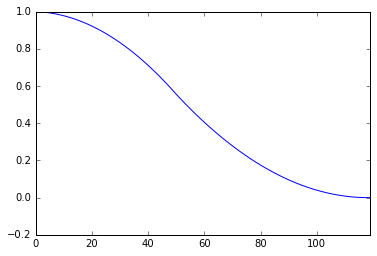

In [149]:
my_plot = dict_of_dfs_by_dia[2]['iob_pct_dia_2'].plot(kind='line')

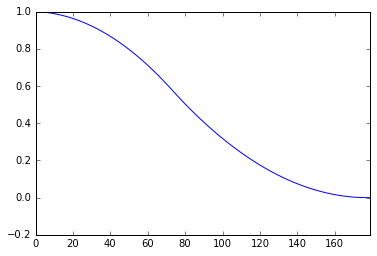

In [150]:
my_plot = dict_of_dfs_by_dia[3]['iob_pct_dia_3'].plot(kind='line')

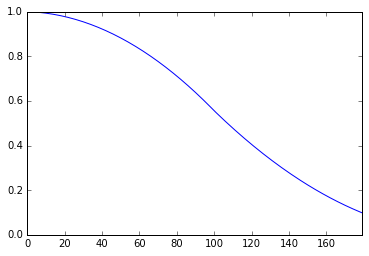

In [151]:
my_plot = dict_of_dfs_by_dia[4]['iob_pct_dia_4'].plot(kind='line')

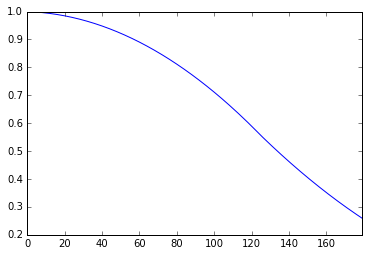

In [152]:
my_plot = dict_of_dfs_by_dia[5]['iob_pct_dia_5'].plot(kind='line')

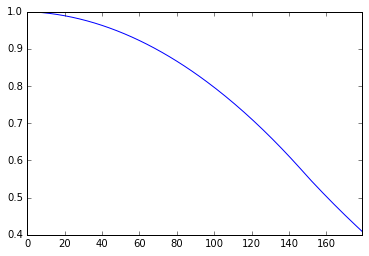

In [153]:
my_plot = dict_of_dfs_by_dia[6]['iob_pct_dia_6'].plot(kind='line')

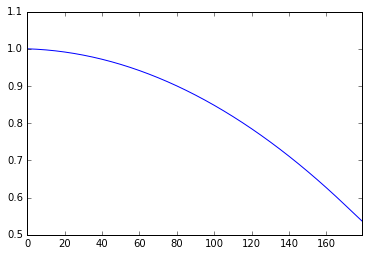

In [154]:
my_plot = dict_of_dfs_by_dia[7]['iob_pct_dia_7'].plot(kind='line')

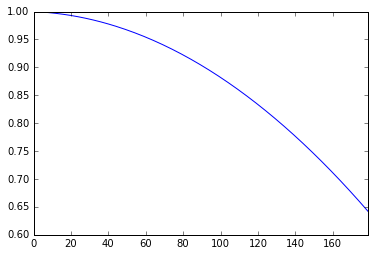

In [155]:
my_plot = dict_of_dfs_by_dia[8]['iob_pct_dia_8'].plot(kind='line')